In [8]:
import pandas as pd
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
#X---FEATURES WE WANT TO WORK ON
#Y---TARGET VARIABLE
X=dataset.iloc[:,3:13]
Y=dataset.iloc[:,13]

In [10]:
#ENCODING THE CATEGORICAL VARIABLES USING PANDAS GET DUMMIES
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [11]:
X=pd.concat([X,geography,gender],axis=1)
X=X.drop(['Geography','Gender'],axis=1)

In [12]:
#TRAIN TEST SPLIT TO TRAIN THE DATA AND TEST THE DATA
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#FEAUTURE SCALING :
# IT IS VERY IMP AS IN DEEP LEARNING AS WE MULTIPLY WEIGHTS IN FRONT AND BACK PROPOGATION AND WE SHOULD TRY 
# TO REACH GLOBAL MINIMA POINT FASTER IN GRADIENT DESCENT CURVE

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [13]:
#LETS MAKE ANN

In [47]:
from tensorflow import keras #IMPORTING KERAS

In [48]:
from tensorflow.keras.models import Sequential #IT IS AN EMPTY NEURAL NETWORK

In [49]:
from tensorflow.keras.layers import Dense #FOR HIDDEN LAYERS

In [50]:
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU #IMPORTING ACTIVATION FUNCTIONS

In [51]:
from tensorflow.keras.layers import Dropout #We introduce this so we dont overfit the data.
#(i.e Regularization parameter)

In [85]:
#INITIALIZE ANN
classifier=Sequential() #EMPTY NEURAL NETWORK
#ADDING THE INPUT LAYER AND FIRST LAYER OF NEURONS
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim=11))
#IN OUR FIRST HIDDEN LAYER WE HAVE 6 HIDDEN NEURONS AND WE ARE USING RELU AS ACTIVATION FUNCTION ALONG RELU 
# HE UNIFORM AND HE NORMAL WORKS WELL FOR WEIGHT INTIALIZATION
# THE FEATURES ARE 11 INDEPENDENT DIMENSIONS INPUT_DIM =11 IN OUR CASE
# HERE WE USE CAN RELU AND LEAKY RELU INSTEAD OF SIGMOID AS RELU AND LEAKY RELU PREVENTS VANISHING GRADIENT PROBLEM 
# i.e OLD WEIGHTS WONT BE EQUAL TO NEW WEIGHTS..

In [86]:
#ADDING SECONG HIDDEN LAYER
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dropout(0.2))

In [87]:
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))

In [88]:
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))

In [89]:
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dropout(0.2))

In [90]:
classifier.add(Dense(units=5,kernel_initializer='he_uniform',activation='relu'))

In [91]:
classifier.add(Dense(units=4,kernel_initializer='he_uniform',activation='relu'))

In [92]:
classifier.add(Dense(units=3,kernel_initializer='he_normal',activation='relu'))

In [93]:
classifier.add(Dense(units=2,kernel_initializer='he_normal',activation='relu'))

In [94]:
#ADDING OUTPUT LAYER
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
# WITH SIGMOID WE  USE XAVIER/GORAT WEIGHTS INTIALIZATION
# HERE WE ARE USING SIGMOID ACTIVATION FUNCTION AS WE ARE APPLYING BINARY CLASSIFICATION

In [95]:
#LETS SUMMARIZE OUR MODEL
classifier.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)               

In [96]:
#COMPILING ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# HERE WE ARE USING ADMAX OPTIMIZER HELPS IN REDUCING THE LOSS FUNCTION
#  WE ARE USING BINARY_CROSS ENTROPY FOR CALCULATION LOSS FUNCTION AS WE HAVE BINARY CLASSIFICATION IF WE HAVE 
# MULTIPLE CATEGORIES USE CATEGRIAL CROSS ENTROPY
# EVALUATION METRICS IS ACCURACY

In [108]:
# MOSTLY USE RELU ACTIVATION FUNCTION AND HE_UNIFORM AND HE_NORMAL FOR INTIALIZATION OF WEIGHTS  AND ONE NEURON IN THE END

In [97]:
# LETS FIT THE ANN TO THE TRAINING SET
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)
#HERE WE ARE USING 100 EPOCHS AND BATCH_SIZE=10 AS IT COMSUMES LESS RAM 

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5504 - accuracy: 0.7959 - val_loss: 0.4853 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4931 - accuracy: 0.7962 - val_loss: 0.4711 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4815 - accuracy: 0.7962 - val_loss: 0.4689 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4734 - accuracy: 0.7962 - val_loss: 0.4634 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4623 - accuracy: 0.7962 - val_loss: 0.4544 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4576 - accuracy: 0.7962 - val_loss: 0.4504 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4506 - accuracy: 0.7962 - val_loss: 0.4467 - val_accuracy: 0.7955

536/536 [==============================] - 1s 1ms/step - loss: 0.3636 - accuracy: 0.8485 - val_loss: 0.3899 - val_accuracy: 0.8360
Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3591 - accuracy: 0.8502 - val_loss: 0.3870 - val_accuracy: 0.8398
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3630 - accuracy: 0.8461 - val_loss: 0.3777 - val_accuracy: 0.8436
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3563 - accuracy: 0.8498 - val_loss: 0.3788 - val_accuracy: 0.8451
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3582 - accuracy: 0.8563 - val_loss: 0.3787 - val_accuracy: 0.8440
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3538 - accuracy: 0.8548 - val_loss: 0.3818 - val_accuracy: 0.8440
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3532 - accuracy: 0.8569 - val_loss: 0.3807 - val_accuracy: 0.8417
Epoch

In [98]:
#MAKING PREDICTIONS & EVALUATING THE MODEL
#Predicting The results
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

In [99]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve

[[1535   60]
 [ 213  192]]


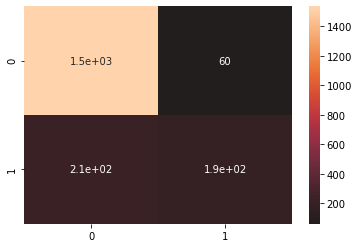

In [100]:
#Making Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,center=True,annot=True)

True Positive Rate [0.         0.03761755 1.        ]
False Positive Rate [0.         0.47407407 1.        ]
threshold [2 1 0]


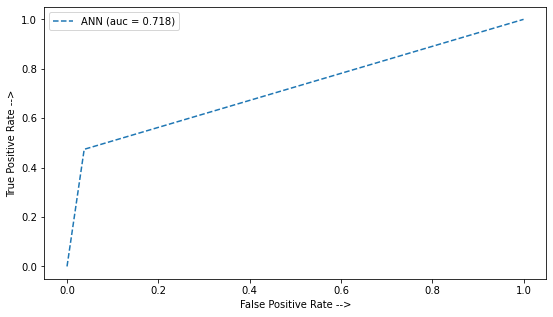

In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
tpr,fpr,threshold=roc_curve(y_test,y_pred)
print('True Positive Rate',tpr)
print('False Positive Rate',fpr)
print('threshold',threshold)

ANN_auc=auc(tpr,fpr)

#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 5))
plt.plot(tpr, fpr, linestyle='--', label='ANN (auc = %0.3f)' %ANN_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [102]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.76      0.47      0.58       405

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [103]:
#Calculating Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score*100)

86.35000000000001


In [104]:
#list all data in evaluation metrics
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


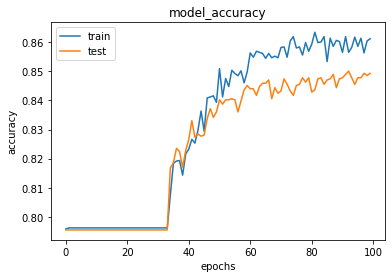

In [106]:
#SUMMARIZE history for accuracy
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [109]:
# ACCURACY INCREASED AS THE NUMBER OF EPOCHS REACHED NEAR 80 - 100

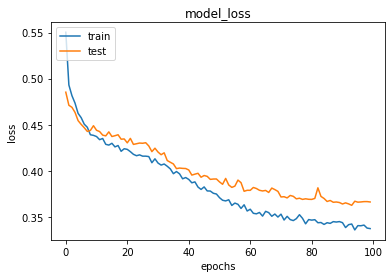

In [110]:
# SUMMARIZE THE LOSS
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [111]:
#  LOSS DECREASED AS THE NUMBER OF EPOCHS REACHED 80 TO 100